In [1]:
# Cell 1: Imports
import csv
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import joblib
import os
import time 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
# Cell 2: Constants and Paths
RANDOM_SEED = 42 # Defined once

# Input CSV Path for dynamic dataset here
dynamic_csv_path = r''

dataset = dynamic_csv_path

# Input directory path of base folder
base_dir = r''

base_save_dir = base_dir
model_save_path = os.path.join(base_save_dir, 'dynamic_classifier_two_hands.keras')
tflite_save_path = os.path.join(base_save_dir, 'dynamic_classifier_two_hands.tflite')
scaler_save_path = os.path.join(base_save_dir, 'scaler_two_hands.pkl')

In [3]:
# Cell 3: Number of Classes
NUM_CLASSES = 16

In [ ]:
# Cell 4: Data Dimensions 
NUM_FRAMES = 25
NUM_HANDS = 2
FEATURES_PER_HAND = 46
FEATURES_PER_FRAME = FEATURES_PER_HAND * NUM_HANDS # 92
INPUT_FEATURES = FEATURES_PER_FRAME * NUM_FRAMES 

print(f"Expecting {INPUT_FEATURES} features per sample from CSV.")
print(f"Using NUM_CLASSES = {NUM_CLASSES}")

Expecting 2300 features per sample from CSV.
Using NUM_CLASSES = 16


Loading dataset from: C:\Users\harold\Downloads\Final_StaticDynamic_Latest\Final_StaticDynamic\model\keypoint_classifier\dynamic_keypoint_two_hands.csv
X_dataset shape: (3062, 2300)
y_dataset shape: (3062,)
Unique labels found: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
X_train shape: (2296, 2300), X_test shape: (766, 2300)
Data scaled.
Scaler saved to C:\Users\harold\Downloads\Final_StaticDynamic_Latest\Final_StaticDynamic\model\keypoint_classifier\scaler_two_hands.pkl
X_train_reshaped shape: (2296, 25, 92)
Model defined.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          40,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,800 (167.19 KB)

 Trainable params: 42,800 (167.19 KB)

 Non-trainable params: 0 (0.00 B)

Callbacks defined.
Model compiled.
Starting model training...
Epoch 1/1000
16/18 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1929 - loss: 2.5712
Epoch 1: val_loss improved from inf to 1.89396, saving model to C:\Users\harold\Downloads\Final_StaticDynamic_Latest\Final_StaticDynamic\model\keypoint_classifier\dynamic_classifier_two_hands.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.2105 - loss: 2.5370 - val_accuracy: 0.6880 - val_loss: 1.8940
Epoch 2/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5453 - loss: 1.8277
Epoch 2: val_loss improved from 1.89396 to 1.24444, saving model to C:\Users\harold\Downloads\Final_StaticDynamic_Latest\Final_StaticDynamic\model\keypoint_classifier\dynamic_classifier_two_hands.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.5481 - loss: 1.8195 - val_accuracy: 0.8029 - val_loss: 1.2444
Epoch 3/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7247 - loss: 1.2530
Epoch 3: val_loss improved from 1.24444 to 0.

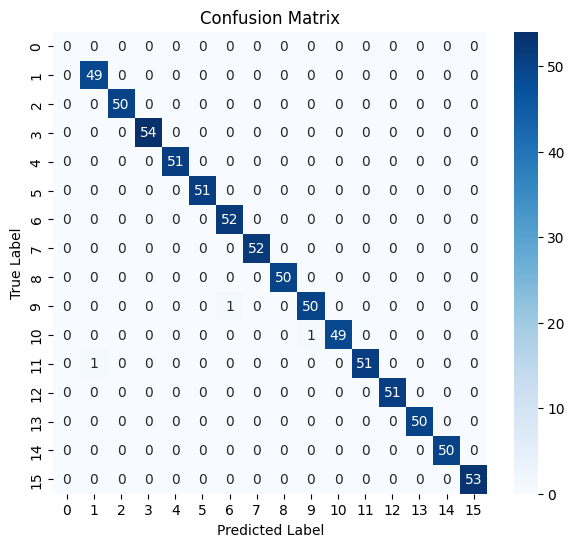


Classification Report
              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00         0
     Class 1       0.98      1.00      0.99        49
     Class 2       1.00      1.00      1.00        50
     Class 3       1.00      1.00      1.00        54
     Class 4       1.00      1.00      1.00        51
     Class 5       1.00      1.00      1.00        51
     Class 6       0.98      1.00      0.99        52
     Class 7       1.00      1.00      1.00        52
     Class 8       1.00      1.00      1.00        50
     Class 9       0.98      0.98      0.98        51
    Class 10       1.00      0.98      0.99        50
    Class 11       1.00      0.98      0.99        52
    Class 12       1.00      1.00      1.00        51
    Class 13       1.00      1.00      1.00        50
    Class 14       1.00      1.00      1.00        50
    Class 15       1.00      1.00      1.00        53

    accuracy                           1.00       766
   

INFO:tensorflow:Assets written to: C:\Users\harold\AppData\Local\Temp\tmprqu95ob0\assets


Saved artifact at 'C:\Users\harold\AppData\Local\Temp\tmprqu95ob0'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 25, 92), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 16), dtype=tf.float32, name=None)
Captures:
  2372552566416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2372552565840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2372552568912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2372552570448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2372707243920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2372707239504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2372707242768: TensorSpec(shape=(), dtype=tf.resource, name=None)
TFLite model saved.
Initializing TFLite interpreter...
TFLite interpreter initialized.
TFLite Input Details: [{'name': 'serving_default_input_layer:0', 'index': 0, 'shape': array([ 1, 25, 92]), 'shape_signature': ar

In [ ]:
# Cell 5: Load Features (X)
print(f"Loading dataset from: {dataset}")
if not os.path.exists(dataset):
    print(f"ERROR: Dataset file not found at {dataset}")
else:
    # Loads columns 1 to 1840 (inclusive)
    X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, INPUT_FEATURES + 1)), skiprows=1) 

    # Cell 6: Load Labels (Y)
    y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0), skiprows=1) 
    print(f"y_dataset shape: {y_dataset.shape}")
    unique_labels = np.unique(y_dataset)
    print(f"Unique labels found: {unique_labels}")
    # Verification check
    if max(unique_labels) >= NUM_CLASSES:
        print(f"WARNING: Max label found ({max(unique_labels)}) is >= NUM_CLASSES ({NUM_CLASSES}). Check NUM_CLASSES setting!")

    # Cell 7: Train/Test Split
    X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED, stratify=y_dataset)
    print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")

    # Cell 8: Feature Scaling and Saving Scaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    print("Data scaled.")
    joblib.dump(scaler, scaler_save_path)
    print(f"Scaler saved to {scaler_save_path}")

    # Cell 9: Reshape Data and Define LSTM Model
    X_train_reshaped = X_train_scaled.reshape(-1, NUM_FRAMES, FEATURES_PER_FRAME)
    X_test_reshaped = X_test_scaled.reshape(-1, NUM_FRAMES, FEATURES_PER_FRAME)
    print(f"X_train_reshaped shape: {X_train_reshaped.shape}")

    model = tf.keras.models.Sequential([
        tf.keras.layers.Input((NUM_FRAMES, FEATURES_PER_FRAME)), # Input shape (20, 92)
        tf.keras.layers.LSTM(64, return_sequences=False),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax') # Output uses NUM_CLASSES
    ])
    print("Model defined.")

    # Cell 10: Model Summary
    model.summary()

    # Cell 11: Callbacks
    cp_callback = tf.keras.callbacks.ModelCheckpoint(
        model_save_path, monitor='val_loss', save_best_only=True,
        save_weights_only=False, verbose=1
    )
    es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=1)
    print("Callbacks defined.")

    # Cell 12: Model Compilation
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    print("Model compiled.")

    # Cell 13: Model Training
    print("Starting model training...")
    history = model.fit(
        X_train_reshaped, y_train,
        epochs=1000, batch_size=128,
        validation_data=(X_test_reshaped, y_test),
        callbacks=[cp_callback, es_callback]
    )
    print("Model training finished.")

    # Cell 14: Load Best Model and Evaluate
    print(f"Loading best model from: {model_save_path}")
    # Load the best model saved by the callback BEFORE evaluation
    try:
        model = tf.keras.models.load_model(model_save_path)
        print("Evaluating best model on test data...")
        val_loss, val_acc = model.evaluate(X_test_reshaped, y_test, batch_size=128)
        print(f"Best Model Validation Loss: {val_loss}")
        print(f"Best Model Validation Accuracy: {val_acc}")
    except Exception as e:
        print(f"Error loading or evaluating model: {e}")


    # Cell 15: Inference test on one sample
    print("Running inference test on one sample...")
    if 'model' in locals() and X_test_reshaped.size > 0: # Check if model loaded and data exists
      predict_result = model.predict(np.array([X_test_reshaped[0]]))
      print(f"Raw prediction: {np.squeeze(predict_result)}")
      print(f"Predicted class: {np.argmax(np.squeeze(predict_result))}")
      print(f"Actual class: {y_test[0]}")
    else:
      print("Skipping inference test due to previous error or no data.")


    # Cell 16: Confusion Matrix and Classification Report
    def print_confusion_matrix(y_true, y_pred, num_classes, report=True):
        # Ensure labels are within the expected range [0, num_classes-1]
        labels = list(range(num_classes))
        cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
        df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
        fig, ax = plt.subplots(figsize=(7, 6))
        sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False, cmap="Blues") # Added cmap
        ax.set_ylim(num_classes, 0) # Use num_classes
        plt.title("Confusion Matrix")
        plt.ylabel("True Label")
        plt.xlabel("Predicted Label")
        plt.show()
        if report:
            print('\nClassification Report')
            # Ensure target names match the number of classes and labels used
            target_names = [f"Class {l}" for l in labels]
            print(classification_report(y_true, y_pred, labels=labels, target_names=target_names, zero_division=0)) # Added zero_division=0

    print("Generating predictions for classification report...")
    if 'model' in locals() and X_test_reshaped.size > 0: # Check if model loaded and data exists
      Y_pred = model.predict(X_test_reshaped)
      y_pred = np.argmax(Y_pred, axis=1)
      print_confusion_matrix(y_test, y_pred, NUM_CLASSES) # Pass NUM_CLASSES
    else:
      print("Skipping confusion matrix due to previous error or no data.")


    # Cell 17: Save Final Model for Inference
    if 'model' in locals(): # Check if model exists
      print(f"Saving final inference model to: {model_save_path}")
      model.save(model_save_path, include_optimizer=False)
    else:
      print("Skipping saving inference model due to previous error.")


    # Cell 18: Convert to TFLite
    if 'model' in locals(): # Check if model exists
      print(f"Converting model to TFLite: {tflite_save_path}")
      try:
        converter = tf.lite.TFLiteConverter.from_keras_model(model)
        converter.optimizations = [tf.lite.Optimize.DEFAULT]
        converter.target_spec.supported_ops = [
            tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS
        ]
        converter._experimental_lower_tensor_list_ops = False
        tflite_quantized_model = converter.convert()

        with open(tflite_save_path, 'wb') as f:
            f.write(tflite_quantized_model)
        print("TFLite model saved.")
      except Exception as e:
          print(f"Error during TFLite conversion: {e}")
    else:
      print("Skipping TFLite conversion due to previous error.")


    # Cell 19: Initialize TFLite Interpreter
    if os.path.exists(tflite_save_path):
      print("Initializing TFLite interpreter...")
      try:
        interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
        interpreter.allocate_tensors()
        print("TFLite interpreter initialized.")
      except Exception as e:
          print(f"Error initializing TFLite interpreter: {e}")
          interpreter = None # Ensure interpreter is None if init fails
    else:
        print("Skipping TFLite interpreter initialization, file not found.")
        interpreter = None


    # Cell 20: Get TFLite I/O Details
    if interpreter:
      input_details = interpreter.get_input_details()
      output_details = interpreter.get_output_details()
      print("TFLite Input Details:", input_details)
      print("TFLite Output Details:", output_details)
    else:
      print("Skipping TFLite I/O details.")


    # Cell 21: TFLite Inference Test Prep
    if interpreter and 'scaler' in locals() and X_test.size > 0: # Check dependencies
      print("Running TFLite inference test...")
      sample_index = 0
      single_sample_original = np.array([X_test[sample_index]], dtype=np.float32)
      single_sample_scaled = scaler.transform(single_sample_original)
      single_sample_reshaped = single_sample_scaled.reshape(1, NUM_FRAMES, FEATURES_PER_FRAME)
      interpreter.set_tensor(input_details[0]['index'], single_sample_reshaped)

      # Cell 22: Run TFLite Inference
      print("Invoking TFLite interpreter...")
      start_time_tflite = time.time()
      interpreter.invoke()
      end_time_tflite = time.time()
      print(f"TFLite inference time: {(end_time_tflite - start_time_tflite) * 1000:.2f} ms")
      tflite_results = interpreter.get_tensor(output_details[0]['index'])

      # Cell 23: Print TFLite Results
      print(f"TFLite Raw prediction: {np.squeeze(tflite_results)}")
      print(f"TFLite Predicted class: {np.argmax(np.squeeze(tflite_results))}")
      print(f"Actual class: {y_test[sample_index]}")
    else:
      print("Skipping TFLite inference test due to missing interpreter, scaler, or data.")